In [1]:
import pandas as pd
import os
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = '/home/steffi/dev/data/ExpW/ExpwCleaned'
labels_csv = '/home/steffi/dev/data/ExpW/labels_clean.csv'

In [3]:
expw = pd.read_csv(labels_csv, delimiter=',')

In [4]:
expw.head()

,Image name,bbox,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,awe_grandmother_214_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0
1,mad_woman_303_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0
2,fierce_european_896_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0
3,annoyed_father_453_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0
4,mad_infant_734_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0


In [5]:
expressions = expw.iloc[:, 2:]

In [6]:
expression_mapping = {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "sad",
    5: "surprise",
    6: "neutral"
}

## Hist plot for all values (even though 0 is actually useless)

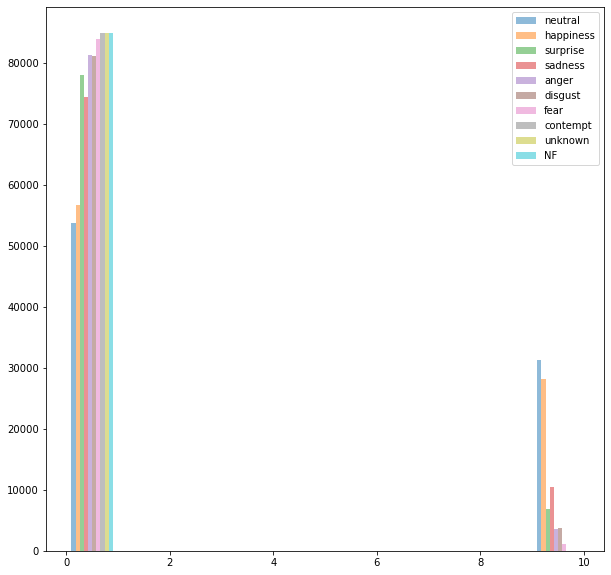

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(expressions, alpha=0.5, label=expressions.columns)
ax.legend()

#### Filter out all values that are equal to 0

In [8]:
expressions.value_counts(sort=True)

neutral  happiness  surprise  sadness  anger  disgust  fear  contempt  unknown  NF
10       0          0         0        0      0        0     0         0        0     31189
0        10         0         0        0      0        0     0         0        0     28112
         0          0         10       0      0        0     0         0        0     10394
                    10        0        0      0        0     0         0        0      6849
                    0         0        0      10       0     0         0        0      3689
                                       10     0        0     0         0        0      3549
                                       0      0        10    0         0        0      1048
dtype: int64

#### ===> columns contempt, unkown and NF can be dropped 

In [9]:
expressions_drop = expressions.drop(columns=["unknown", "contempt", "NF"])

In [10]:
exp_nan = expressions_drop.replace(0, np.NaN)

In [11]:
exp_stacked = exp_nan.stack(dropna=True)

In [12]:
exp_unstacked = exp_stacked.reset_index(level=1)
expressions_single = exp_unstacked.rename(columns={"level_1": "expression"}).drop(columns=[0])

In [13]:
expressions_single.head()

,expression
0,fear
1,fear
2,fear
3,fear
4,fear


### Append expressions to expw

In [14]:
expw["expression"] = expressions_single["expression"]

In [15]:
expw.head()

,Image name,bbox,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF,expression
0,awe_grandmother_214_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0,fear
1,mad_woman_303_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0,fear
2,fierce_european_896_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0,fear
3,annoyed_father_453_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0,fear
4,mad_infant_734_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0,fear


### Remove unnecessary columns

In [16]:
expw_minimal = expw.drop(expw.columns[1:-1], axis=1)

In [17]:
expw_minimal.loc[:, "Image name"] = data_dir + "/" + expw_minimal["Image name"].astype(str)

In [81]:
expw_minimal.shape

(84830, 2)

### Histogram of expression distribution

In [19]:
x_ticks = [f"{idx} = {expr}, count: {count}" for idx, (expr, count) in enumerate(zip(list(expressions_single.value_counts().index.get_level_values(0)), expressions_single.value_counts().values))]

In [20]:
x_ticks

['0 = neutral, count: 31189',
 '1 = happiness, count: 28112',
 '2 = sadness, count: 10394',
 '3 = surprise, count: 6849',
 '4 = disgust, count: 3689',
 '5 = anger, count: 3549',
 '6 = fear, count: 1048']

[Text(0, 0, '0 = neutral, count: 31189'),
 Text(0, 1, '1 = happiness, count: 28112'),
 Text(0, 2, '2 = sadness, count: 10394'),
 Text(0, 3, '3 = surprise, count: 6849'),
 Text(0, 4, '4 = disgust, count: 3689'),
 Text(0, 5, '5 = anger, count: 3549'),
 Text(0, 6, '6 = fear, count: 1048')]

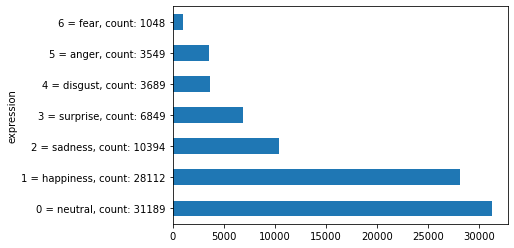

In [21]:
ax = expressions_single.value_counts().plot(kind='barh')
ax.set_yticklabels(x_ticks)

### Create a csv file with all absolute image paths for annotating with FairFace

In [22]:
col_name = "img_path"

In [23]:
image_names = expw[["Image name"]]

In [24]:
image_names.head()

,Image name
0,awe_grandmother_214_0.png
1,mad_woman_303_0.png
2,fierce_european_896_0.png
3,annoyed_father_453_0.png
4,mad_infant_734_0.png


In [25]:
image_names.rename(columns={"Image name": "img_path"}, inplace=True)

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [26]:
image_names.loc[:, "img_path"] = data_dir + "/" + image_names["img_path"].astype(str)

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [27]:
save_path = "/home/steffi/dev/independent_study/FairFace/expw_image_paths.csv"

In [28]:
image_names.to_csv(save_path, index=False)

### Filter only img_paths which contain "black", "African", "chinese", "asian"

In [27]:
black = image_names.loc[image_names.img_path.str.contains('(black)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [28]:
african = image_names.loc[image_names.img_path.str.contains('(African)'), :]

In [29]:
asian = image_names.loc[image_names.img_path.str.contains('(asian)'), :]

In [30]:
chinese = image_names.loc[image_names.img_path.str.contains('(chinese)'), :]

In [31]:
filtered = pd.concat([black, african, asian, chinese])

### Filter and save subgroups

##### Anger

In [32]:
black_angry_annoyed = black.loc[image_names.img_path.str.contains('(angry)|(annoyed)'), :]

In [51]:
black_angry_annoyed.to_csv("/home/steffi/dev/independent_study/FairFace/black_angry_annoyed.csv", index=False)

In [33]:
black_angry_annoyed.head()

,img_path
407,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
750,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
791,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
1271,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
1790,/home/steffi/dev/data/ExpW/ExpwCleaned/angry_b...


In [34]:
african_angry_annoyed = african.loc[image_names.img_path.str.contains('(angry)|(annoyed)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [114]:
african_angry_annoyed.to_csv("/home/steffi/dev/independent_study/FairFace/african_angry_annoyed.csv", index=False)

In [35]:
african_angry_annoyed.shape

(190, 1)

In [36]:
asian_angry_annoyed = asian.loc[image_names.img_path.str.contains('(angry)|(annoyed)'), :]

In [37]:
asian_angry_annoyed

,img_path
126,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
612,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
1775,/home/steffi/dev/data/ExpW/ExpwCleaned/angry_a...
1900,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
2043,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
...,...
83107,/home/steffi/dev/data/ExpW/ExpwCleaned/angry_a...
83571,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
84370,/home/steffi/dev/data/ExpW/ExpwCleaned/angry_a...
84542,/home/steffi/dev/data/ExpW/ExpwCleaned/angry_a...


In [54]:
asian_angry_annoyed.to_csv("/home/steffi/dev/independent_study/FairFace/asian_angry_annoyed.csv", index=False)

In [38]:
chinese_angry_annoyed = chinese.loc[image_names.img_path.str.contains('(angry)|(annoyed)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [102]:
chinese_angry_annoyed.head()

,img_path
814,/home/steffi/dev/data/ExpW/ExpwCleaned/angry_c...
872,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
2124,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
2883,/home/steffi/dev/data/ExpW/ExpwCleaned/annoyed...
2919,/home/steffi/dev/data/ExpW/ExpwCleaned/angry_c...


In [103]:
chinese_angry_annoyed.to_csv("/home/steffi/dev/independent_study/FairFace/chinese_angry_annoyed.csv", index=False)

##### Surprise

In [39]:
black_awe_astound_amazed = black.loc[image_names.img_path.str.contains('(awe)|(astound)|(amazed)'), :]

In [40]:
black_awe_astound_amazed

,img_path
309,/home/steffi/dev/data/ExpW/ExpwCleaned/amazed_...
900,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
1060,/home/steffi/dev/data/ExpW/ExpwCleaned/amazed_...
1087,/home/steffi/dev/data/ExpW/ExpwCleaned/amazed_...
1090,/home/steffi/dev/data/ExpW/ExpwCleaned/amazed_...
...,...
83597,/home/steffi/dev/data/ExpW/ExpwCleaned/amazed_...
83663,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
84206,/home/steffi/dev/data/ExpW/ExpwCleaned/amazed_...
84469,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...


In [63]:
black_awe_astound_amazed.to_csv("/home/steffi/dev/independent_study/FairFace/black_awe_astound_amazed.csv", index=False)

In [70]:
african_awe = african.loc[image_names.img_path.str.contains('(awe)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [71]:
african_awe

,img_path
1200,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_158_5.png
1453,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_218_0.png
1733,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_158_7.png
4031,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_326_0.png
4079,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_516_0.png
...,...
83741,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_683_0.png
84001,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_764_0.png
84169,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_113_0.png
84655,/home/steffi/dev/data/ExpW/ExpwCleaned/awe_African_214_0.png


In [72]:
african_awe.to_csv("/home/steffi/dev/independent_study/FairFace/african_awe.csv", index=False)

In [41]:
asian_astound = asian.loc[image_names.img_path.str.contains('(astound)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [97]:
asian_astound.to_csv("/home/steffi/dev/independent_study/FairFace/asian_astound.csv", index=False)

In [98]:
asian_astound

,img_path
416,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
1452,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
1469,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
1713,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
2336,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
...,...
82592,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
82652,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
82704,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
83461,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...


In [48]:
chinese_astound = chinese.loc[image_names.img_path.str.contains('(astound)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [50]:
chinese_astound.to_csv("/home/steffi/dev/independent_study/FairFace/chinese_astound.csv", index=False)

In [49]:
chinese_astound

,img_path
112,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
243,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
4739,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
5404,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
6236,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
...,...
83819,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
83895,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
84014,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...
84066,/home/steffi/dev/data/ExpW/ExpwCleaned/astound...


#### Fear

In [42]:
black_fear = black.loc[image_names.img_path.str.contains('(fear)|(frightened)|(anxious)|(shocked)'), :]

In [43]:
black_fear.shape

(74, 1)

In [73]:
african_fear = african.loc[image_names.img_path.str.contains('(fear)|(frightened)|(anxious)|(shocked)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [75]:
black_african_fear = pd.concat([african_fear, black_fear])

In [76]:
black_african_fear.shape

(191, 1)

In [77]:
black_african_fear.to_csv("/home/steffi/dev/independent_study/FairFace/black_african_fear.csv", index=False)

#### Disgust

In [51]:
black_disgust = black.loc[image_names.img_path.str.contains('(distaste)|(disgust)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [58]:
african_digsust = african.loc[image_names.img_path.str.contains('(distaste)|(disgust)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [59]:
african_digsust.shape

(51, 1)

In [62]:
black_african_disgust = pd.concat([black_disgust, african_digsust])

In [55]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-55-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [63]:
black_african_disgust

,img_path
214,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_black_340_3.png
4172,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_black_670_0.png
5179,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_black_256_5.png
5265,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_black_47_0.png
6275,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_black_293_0.png
...,...
81195,/home/steffi/dev/data/ExpW/ExpwCleaned/distaste_African_347_1.png
81384,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_African_701_0.png
81895,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_African_137_0.png
83583,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_African_940_1.png


In [64]:
black_african_disgust.to_csv("/home/steffi/dev/independent_study/FairFace/black_african_disgust.csv", index=False)

In [78]:
disgust_all = image_names.loc[image_names.img_path.str.contains('(distaste)|(disgust)'), :]

/home/steffi/.conda/envs/InferFace/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [79]:
disgust_all.shape

(2220, 1)

In [80]:
disgust_all

,img_path
13,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_expression_429_0.png
31,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_people_45_0.png
50,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_girl_4_0.png
82,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_infant_361_0.png
91,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_man_293_0.png
...,...
84748,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_yang_323_0.png
84752,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_asian_679_4.png
84766,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_black_156_0.png
84775,/home/steffi/dev/data/ExpW/ExpwCleaned/disgust_expression_586_6.png


#### Saving all filtered to csv

In [44]:
filtered_save_path = "/home/steffi/dev/independent_study/FairFace/filtered_expw_image_paths.csv"

In [45]:
filtered.to_csv(filtered_save_path, index=False)